In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import astropy.units as u

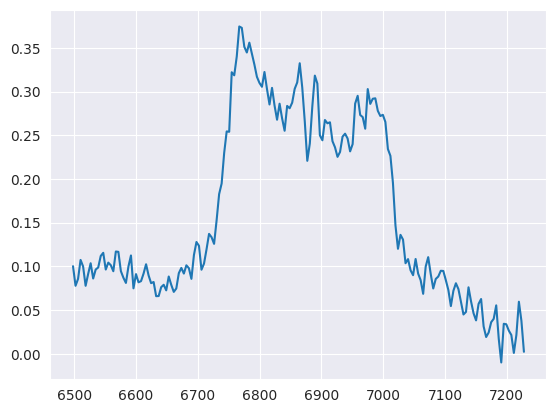

In [26]:
tab = Table.read("/home/nmearl/research/tde_agn_comparison/data/TDE2018hyz_58484.0.csv", format='ascii.csv')

fig, ax = plt.subplots()

ax.plot(tab['wave'], tab['flux'])

In [ ]:
parsed_path = Path("/home/nmearl/research/tde_agn_comparison/parsed")

for file_name in parsed_path.glob("*.ecsv"):
    print(file_name.stem)
    for seg in ['2018zr', '2020zso', '2018hyz', '14li', '09djl']:
        if seg not in file_name.stem:
            continue
    
        tab = Table.read(file_name, format='ascii.ecsv')
        
        fig, ax = plt.subplots()
        
        rest_wave = tab['wave'] / (1 + tab.meta['redshift'])
        ha_mask = (rest_wave > 6563 - 300) & (rest_wave < 6563 + 300)
        flux = (tab['flux'][ha_mask] * u.erg / u.s / u.cm ** 2 / u.AA).to(u.mJy, u.spectral_density(rest_wave[ha_mask] * u.AA))
        
        # ax.errorbar(tab['wave'], tab['flux'], yerr=tab['uncertainty'], fmt='o')
        ax.plot(rest_wave[ha_mask], flux)
        ax.axvline(6563, color='r', linestyle='--')
        ax.axhline(0, color='k', linestyle='--')
        ax.set_title(tab.meta['name'])
    
    

In [ ]:
data_dir = Path("/home/nmearl/research/tde_agn_comparison/data")
sorted(data_dir.glob("*.csv"))

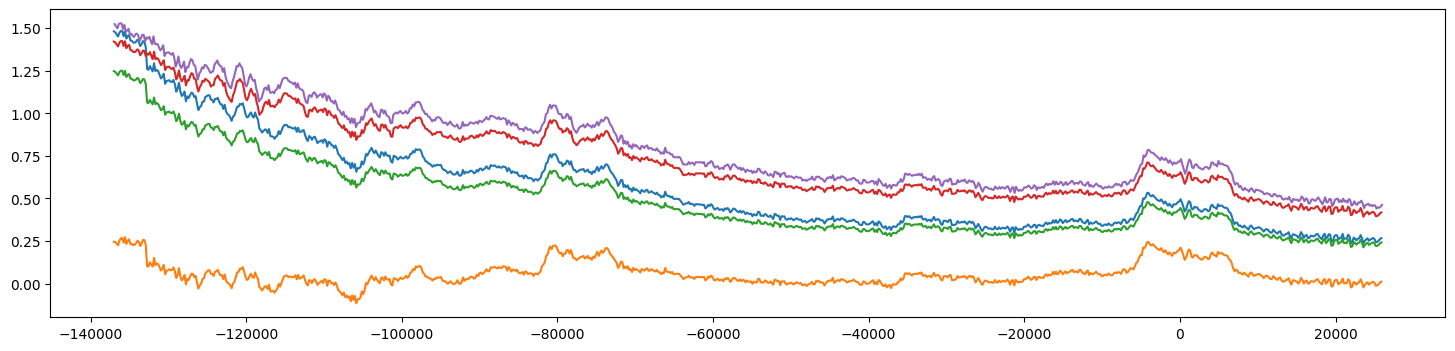

In [ ]:
hyz_tab = Table.read("/Users/nmearl/Downloads/AT2018hyz_2458484.5_ESO-NTT_EFOSC2-NTT_None_0.txt", format='ascii', names=('wave', 'flux'))
hyz_tab2 = Table.read("/Users/nmearl/Downloads/AT2018hyz_2458484.5_ESO-NTT_EFOSC2-NTT_None.txt", format='ascii', names=('wave', 'flux'))

hyz_tab3 = Table.read("/Users/nmearl/Downloads/2018hyz_2019-01-01_ESO-NTT_EFOSC2-NTT_None_0.txt", format='ascii', names=('wave', 'flux'))
hyz_tab4 = Table.read("/Users/nmearl/Downloads/2018hyz_2019-01-01_ESO-NTT_EFOSC2-NTT_None.txt", format='ascii', names=('wave', 'flux'))

hyz_tab5 = Table.read("/Users/nmearl/Downloads/AT2018hyz_2019-01-01_08-03-09_ESO-NTT_EFOSC2-NTT_PESSTO_SSDR1-4.csv", format='ascii', names=('wave', 'flux', 'err', 'bgerr'))

redshift = 0.04573

fig, ax = plt.subplots(figsize=(18, 4))

for tab in [hyz_tab, hyz_tab2, hyz_tab3, hyz_tab4, hyz_tab5]:
    rest_wave = tab['wave'] / (1 + redshift)
    rest_vel = (rest_wave * u.AA).to(u.km / u.s, u.doppler_optical(6563 * u.AA))
    ha_mask = (rest_wave > 6563 - 3000) & (rest_wave < 6563 + 3000)
    flux = (tab['flux'][ha_mask] * 1e15)
    
    ax.plot(rest_vel[ha_mask], flux)

In [11]:
zr_tab = Table.read("/Users/nmearl/research/tde_agn_comparison/data/TDE2018zr_58235.0.csv", format='ascii', names=('wave', 'flux', 'error'))

zr_tab['flux'] / zr_tab['error']

0.0098609590487685
-0.07396505888977954
-0.1036832118736997
0.15028262709902962
0.4525827459025837
0.22121061952507906
0.5185407016524989
0.6960844708639761
0.31177559116694276
0.23455449805780434
0.3866344405144576
